In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
p=pd.read_csv("datasets/ids.csv")
print(p)

         Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0               0         0  15/02/2018 08:25:18      112641158             3   
1              22         6  15/02/2018 08:29:05       37366762            14   
2           47514         6  15/02/2018 08:29:42            543             2   
3               0         0  15/02/2018 08:28:07      112640703             3   
4               0         0  15/02/2018 08:30:56      112640874             3   
...           ...       ...                  ...            ...           ...   
1048570     50111         6  15/02/2018 09:04:42             22             3   
1048571       443         6  15/02/2018 09:03:55       54682783             5   
1048572       443         6  15/02/2018 09:03:56       53682093             5   
1048573       443         6  15/02/2018 09:03:55       54683364             5   
1048574       443         6  15/02/2018 09:02:01      116857161            18   

         Tot Bwd Pkts  TotL

In [2]:
'''import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
p=clean_dataset(p)'''

'import pandas as pd\nimport numpy as np\n\ndef clean_dataset(df):\n    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"\n    df.dropna(inplace=True)\n    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)\n    return df[indices_to_keep].astype(np.float64)\np=clean_dataset(p)'

In [58]:
p.isnull().sum()


Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64

In [59]:
num_cols = p._get_numeric_data().columns
print(num_cols)

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

C:\Users\uveer\AppData\Local\Temp\ipykernel_31276\1063704447.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  p = p.dropna('columns')# drop columns with NaN


[<bound method Series.mode of 0              0
1             22
2          47514
3              0
4              0
           ...  
1048570    50111
1048571      443
1048572      443
1048573      443
1048574      443
Name: Dst Port, Length: 1048575, dtype: int64>, <bound method Series.mode of 0          0
1          6
2          6
3          0
4          0
          ..
1048570    6
1048571    6
1048572    6
1048573    6
1048574    6
Name: Protocol, Length: 1048575, dtype: int64>, <bound method Series.mode of 0          15/02/2018 08:25:18
1          15/02/2018 08:29:05
2          15/02/2018 08:29:42
3          15/02/2018 08:28:07
4          15/02/2018 08:30:56
                  ...         
1048570    15/02/2018 09:04:42
1048571    15/02/2018 09:03:55
1048572    15/02/2018 09:03:56
1048573    15/02/2018 09:03:55
1048574    15/02/2018 09:02:01
Name: Timestamp, Length: 1048575, dtype: object>, <bound method Series.mode of 0          112641158
1           37366762
2                543
3  

C:\Users\uveer\AppData\Local\Temp\ipykernel_31276\1063704447.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = p.corr()


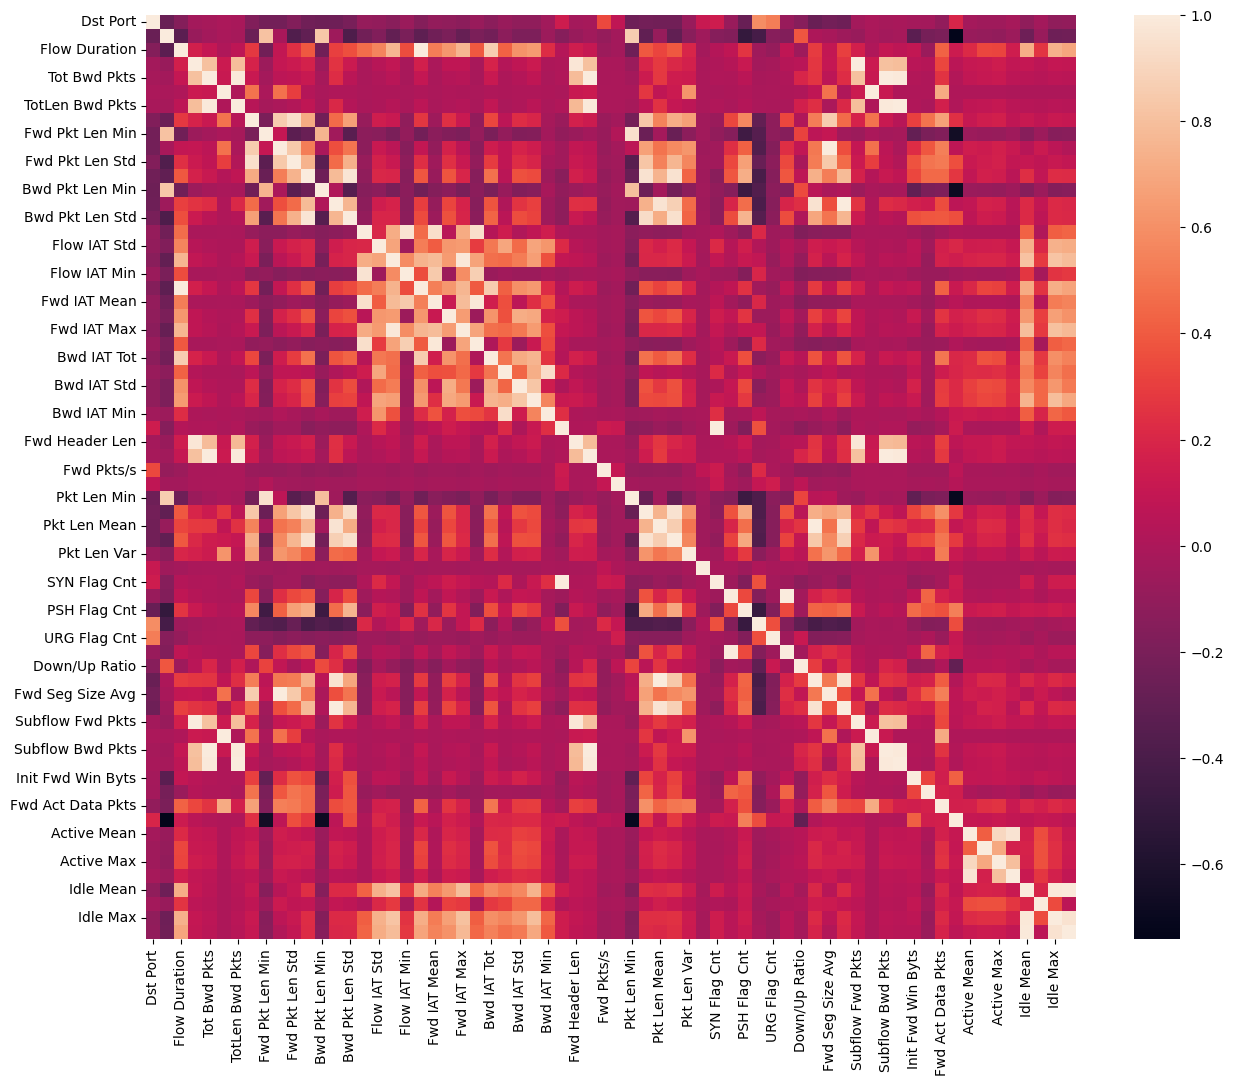

In [101]:


p = p.dropna('columns')# drop columns with NaN
'''p["Dst Port"]=[0 if p["Dst Port"].dtype==str else ]'''
for i in p:
    p[i]=p[i].replace(i,0)
attributesmode=[]
for i in p:
    attributesmode.append(p[i].mode)
print(attributesmode)
p.replace([np.inf, -np.inf], 1, inplace=True)
p = p[[col for col in p if p[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = p.corr()

plt.figure(figsize =(15, 12))

sns.heatmap(corr)

plt.show()



In [1]:
p_set=p[["Dst Port", "Protocol", "Tot Fwd Pkts", "Tot Bwd Pkts","TotLen Fwd Pkts"]]
print(p_set)
print(p_set["Dst Port"]>80)
corr=p_set.corr()
sns.heatmap(corr)
corr.style.background_gradient(cmap ='coolwarm')
print(p_set.isnull().any())




NameError: name 'p' is not defined

In [103]:
print(p["Dst Port"])
print(p["Label"])


0              0
1             22
2          47514
3              0
4              0
           ...  
1048570    50111
1048571      443
1048572      443
1048573      443
1048574      443
Name: Dst Port, Length: 1048575, dtype: int64
0          Benign
1          Benign
2          Benign
3          Benign
4          Benign
            ...  
1048570    Benign
1048571    Benign
1048572    Benign
1048573    Benign
1048574    Benign
Name: Label, Length: 1048575, dtype: object


In [104]:
p["Label"].value_counts()

Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: Label, dtype: int64

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
p=pd.read_csv("../input/ids-intrusion-csv/02-21-2018.csv")
print(p)
p["Label"].value_counts()
p["Dst Port"].value_counts()

FileNotFoundError: [Errno 2] No such file or directory: '../input/ids-intrusion-csv/02-21-2018.csv'

In [105]:
from sklearn.model_selection import train_test_split
y=p["Label"]
y.head
print(y)
x=p.drop(['Label','Timestamp'],axis=1)
x.head
print(x)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)
print(X_train.shape)
''''X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)'''
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

0          Benign
1          Benign
2          Benign
3          Benign
4          Benign
            ...  
1048570    Benign
1048571    Benign
1048572    Benign
1048573    Benign
1048574    Benign
Name: Label, Length: 1048575, dtype: object
         Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0               0         0      112641158             3             0   
1              22         6       37366762            14            12   
2           47514         6            543             2             0   
3               0         0      112640703             3             0   
4               0         0      112640874             3             0   
...           ...       ...            ...           ...           ...   
1048570     50111         6             22             3             0   
1048571       443         6       54682783             5             1   
1048572       443         6       53682093             5             1   
1048573       443 

In [106]:

from sklearn.svm import LinearSVC
svclassifier=LinearSVC()
svclassifier.fit(X_train.values,Y_train)
y_pred=svclassifier.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix 
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))




C:\Users\uveer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\uveer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


[[197160   1600    316]
 [  5782   2596      4]
 [  1451    773     33]]
                       precision    recall  f1-score   support

               Benign       0.96      0.99      0.98    199076
DoS attacks-GoldenEye       0.52      0.31      0.39      8382
DoS attacks-Slowloris       0.09      0.01      0.03      2257

             accuracy                           0.95    209715
            macro avg       0.53      0.44      0.46    209715
         weighted avg       0.94      0.95      0.94    209715



In [107]:
import joblib
joblib.dump(svclassifier,"SVM_DoS")
svmclassifier=joblib.load("SVM_DoS")
svmclassifier.predict(X_test)


C:\Users\uveer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)